In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, Ridge

In [2]:
def remove_outliers(df, variable, threshold=1.5):
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3 - q1

    # Identify outliers
    outliers = (df[variable] < q1 - threshold * iqr) | (df[variable] > q3 + threshold * iqr)

    # Remove outliers
    df_cleaned = df[~outliers]

    return df_cleaned

In [43]:
df = pd.read_excel('scraped_products.xlsx')
df = df.drop('series', axis=1)
df = df.drop('id', axis=1)
df['price'] = df['price'].str.replace(' zł', '').str.replace(' ', '').str.replace(',', '.').astype(float)
df = df.fillna(0)

df = remove_outliers(df, 'price', 1.5)
df = remove_outliers(df, 'year', 1)
df = remove_outliers(df, 'element', 2)
df = remove_outliers(df, 'figures', 2)

print(len(df))
df

378


,price,year,element,figures,manual,box
0,79.99,1991.0,35.0,1.0,1.0,0.0
1,109.99,1994.0,51.0,2.0,1.0,0.0
2,169.99,1992.0,22.0,3.0,1.0,0.0
4,159.99,1995.0,64.0,2.0,1.0,0.0
7,269.99,1997.0,14.0,3.0,0.0,0.0
...,...,...,...,...,...,...
495,69.99,1994.0,62.0,3.0,1.0,0.0
497,49.99,1994.0,44.0,1.0,1.0,0.0
498,49.99,1992.0,33.0,1.0,1.0,0.0
501,119.99,1987.0,36.0,2.0,1.0,0.0


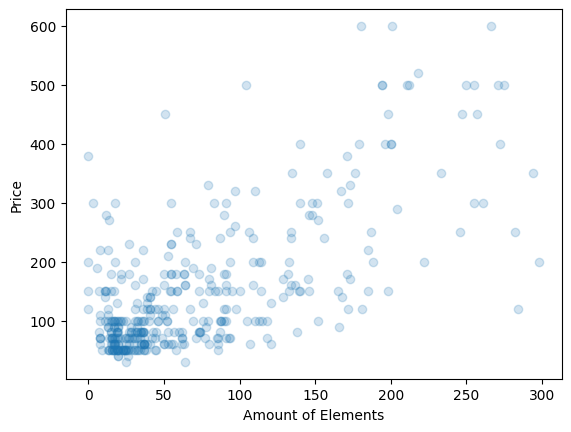

In [4]:
# Scatter plot to visualize relationships
plt.scatter(df['element'], df['price'], alpha=0.2)
plt.xlabel('Amount of Elements')
plt.ylabel('Price')
plt.show()

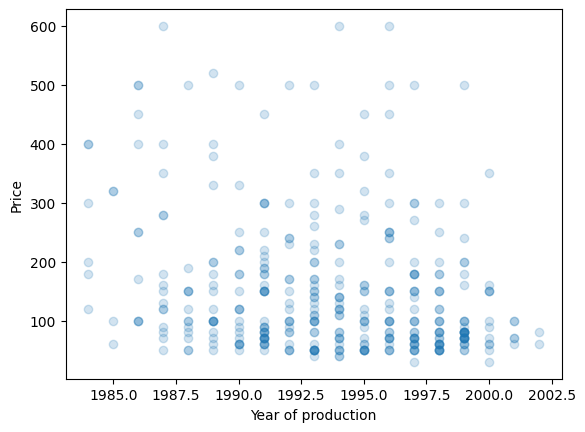

In [5]:
# Scatter plot to visualize relationships
plt.scatter(df['year'], df['price'], alpha=0.2)
plt.xlabel('Year of production')
plt.ylabel('Price')
plt.show()

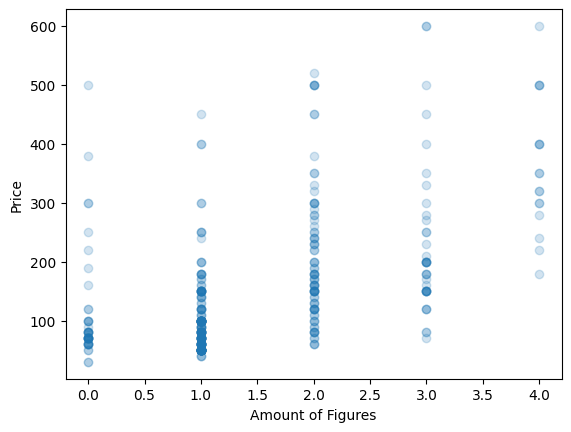

In [6]:
# Scatter plot to visualize relationships
plt.scatter(df['figures'], df['price'], alpha=0.2)
plt.xlabel('Amount of Figures')
plt.ylabel('Price')
plt.show()

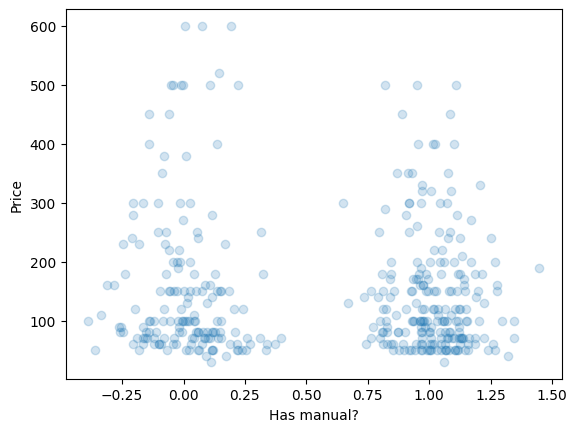

In [7]:
# Scatter plot to visualize relationships
plt.scatter(df['manual']+np.random.normal(0, 0.15, size=len(df['manual'])), df['price'], alpha=0.2)
plt.xlabel('Has manual?')
plt.ylabel('Price')
plt.show()

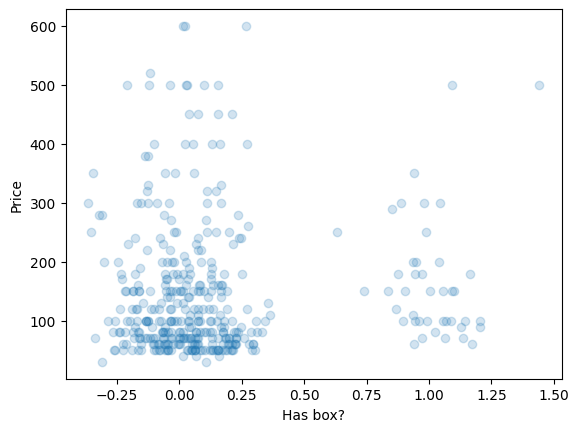

In [8]:
# Scatter plot to visualize relationships
plt.scatter(df['box']+np.random.normal(0, 0.15, size=len(df['box'])), df['price'], alpha=0.2)
plt.xlabel('Has box?')
plt.ylabel('Price')
plt.show()

In [9]:
# Correlation matrix
correlation_matrix = df[['price', 'element', 'year', 'figures', 'box', 'manual']].corr()
print(correlation_matrix)

            price   element      year   figures       box    manual
price    1.000000  0.685460 -0.247489  0.553222  0.064411 -0.056076
element  0.685460  1.000000 -0.168855  0.387963  0.045814  0.069553
year    -0.247489 -0.168855  1.000000 -0.139783  0.050386 -0.052545
figures  0.553222  0.387963 -0.139783  1.000000 -0.073674  0.027395
box      0.064411  0.045814  0.050386 -0.073674  1.000000  0.205858
manual  -0.056076  0.069553 -0.052545  0.027395  0.205858  1.000000


In [56]:
X = df[['year', 'element', 'figures', 'manual', 'box']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2137)

# Standardize features (optional, but can improve performance)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the linear regression model
model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

Mean Squared Error: 5385.530246754252
Mean Absolute Error (MAE): 51.366567434422876
R-squared: 0.6627677285723802


In [57]:
# Predict price for new data
new_data = {'year': [1994], 'element': [407], 'figures': [4], 'manual': [0], 'box': [0]}
new_df = pd.DataFrame(new_data)
new_prediction = model.predict(scaler.transform(new_df))
print(f'Predicted Price for New Data: {new_prediction[0]}')

Predicted Price for New Data: 673.6075227557648


In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2137)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the MLPRegressor model
model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=2137)
model.fit(X_train_scaled, y_train)

# Now, you can use the trained model to make predictions on new data
# For demonstration, let's use the same data for prediction
new_data = pd.DataFrame({'year': [1994], 'element': [407], 'figures': [4], 'manual': [0], 'box': [0]})
new_data_scaled = scaler.transform(new_data)

# Make predictions
predictions = model.predict(new_data_scaled)

print("Predictions:", predictions)

Predictions: [640.10014847]


c:\Users\jakub\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
